In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import re
import time
import random
from scipy.stats import poisson, norm
import pandas as pd
from scipy.sparse import csr_matrix



In [2]:
# df_tags = pd.read_csv('..\\data\\ml-32m\\tags.csv')
# df_links = pd.read_csv('..\\data\\ml-32m\\links.csv')
# df_movies = pd.read_csv('..\\data\\ml-32m\\movies.csv')

In [12]:
# MOVIELENS
# Read the CSV file into a DataFrame

df = pd.read_csv('..\\data\\ml-32m\\ratings.csv')



,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [34]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import re
import time
import random
from scipy.stats import poisson, norm
import pandas as pd
from scipy.sparse import csr_matrix


df = pd.read_csv('..\\data\\ml-32m\\ratings.csv')
matrix = pd.pivot_table(df.tail(3000000), index='userId', columns='movieId', values='rating', aggfunc='mean')
print(matrix)

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
181725      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
181726      4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
181727      4.0     3.0     NaN     NaN     NaN     NaN     NaN     NaN   
181728      NaN     4.0     5.0     NaN     4.0     NaN     NaN     3.0   
181729      3.0     NaN     NaN     NaN     NaN     NaN     3.0     NaN   
...         ...     ...     ...     ...     ...     ...     ...     ...   
200944      4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
200945      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
200946      NaN     NaN     NaN     NaN     NaN     4.0     NaN     NaN   
200947      4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
200948      5.0     1.5     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10     

In [35]:
def visualizeData(dense_matrix):
    # Create a figure and axis
    plt.figure(figsize=(10, 6))

    # Plot the matrix using imshow with a colormap
    plt.imshow(dense_matrix, cmap='viridis', aspect='auto', interpolation='none')

    # Add a colorbar to represent the intensity of the values
    plt.colorbar(label='Intensity')

    # Add labels and title
    plt.title('dense matrix visualization of part of data')
    plt.xlabel('movies')
    plt.ylabel('users')

    # Show the plot
    plt.show()

In [37]:
m = matrix.to_numpy()


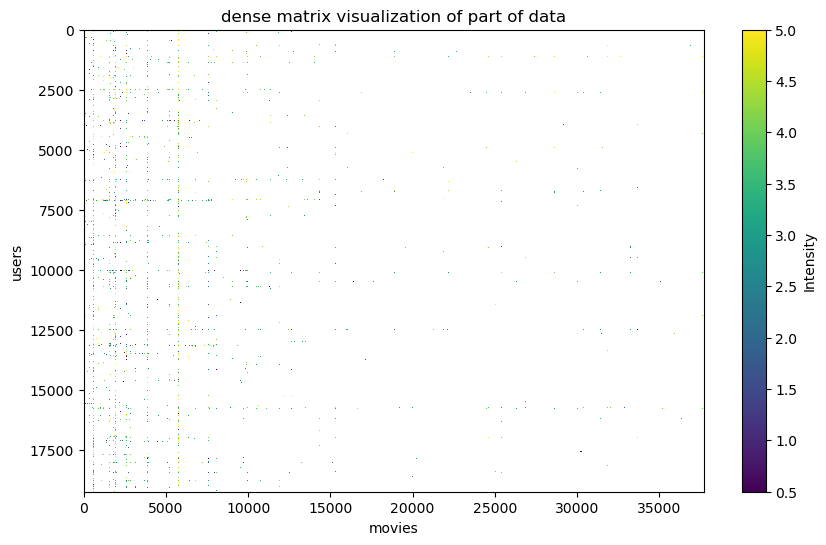

In [38]:
visualizeData(m)

In [17]:

np_ratings = df_unique.values[:32000200, :]

# Convert the 3-column array into a pandas DataFrame
df = pd.DataFrame(np_ratings, columns=['userId', 'movieId', 'rating', 'timestamp'])


In [18]:
user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating', aggfunc='mean')

c:\Users\kesol\anaconda3\lib\site-packages\pandas\core\reshape\reshape.py:126: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

In [14]:
user_movie_matrix

movieId,2.0,10.0,11.0,17.0,25.0,26.0,29.0,30.0,31.0,32.0,...,2890.0,2918.0,2944.0,2966.0,2973.0,2985.0,2997.0,3030.0,3078.0,3088.0
userId,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,4.0,1.0,NaN,2.0,5.0,NaN,5.0,...,4.0,4.0,4.0,1.0,5.0,5.0,4.0,4.0,2.0,3.0
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,3.5,4.0,4.0,5.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
